In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import zipfile
import requests
from io import BytesIO

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'

# Download the ZIP file
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Extract the specific CSV file
    with z.open('AirQualityUCI.csv') as f:
        data = pd.read_csv(f, sep=';')

In [4]:
data.columns = ['DateTime'] + list(data.columns[1:])

In [5]:
data.head()

,DateTime,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DateTime       9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [7]:
data.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [8]:
data.isnull().sum()

,0
DateTime,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [9]:
data_cleaned = data.dropna()

In [10]:
data.head()

,DateTime,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


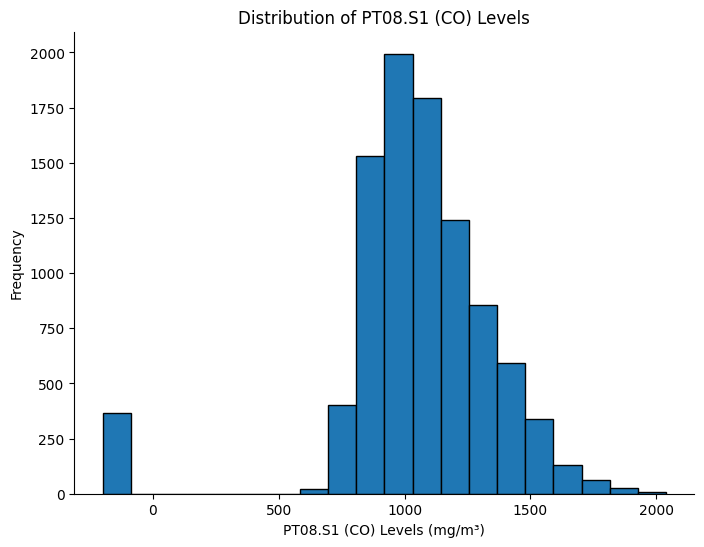

In [11]:
plt.figure(figsize=(8, 6))
data['PT08.S1(CO)'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of PT08.S1 (CO) Levels')
plt.xlabel('PT08.S1 (CO) Levels (mg/m³)')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide the top and right spines
plt.show()

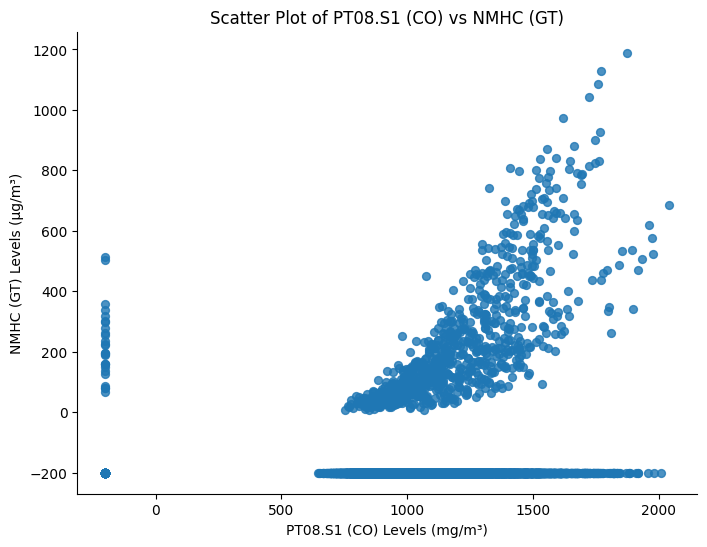

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(data['PT08.S1(CO)'], data['NMHC(GT)'], s=32, alpha=0.8)
plt.title('Scatter Plot of PT08.S1 (CO) vs NMHC (GT)')
plt.xlabel('PT08.S1 (CO) Levels (mg/m³)')
plt.ylabel('NMHC (GT) Levels (μg/m³)')
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide the top and right spines
plt.show()

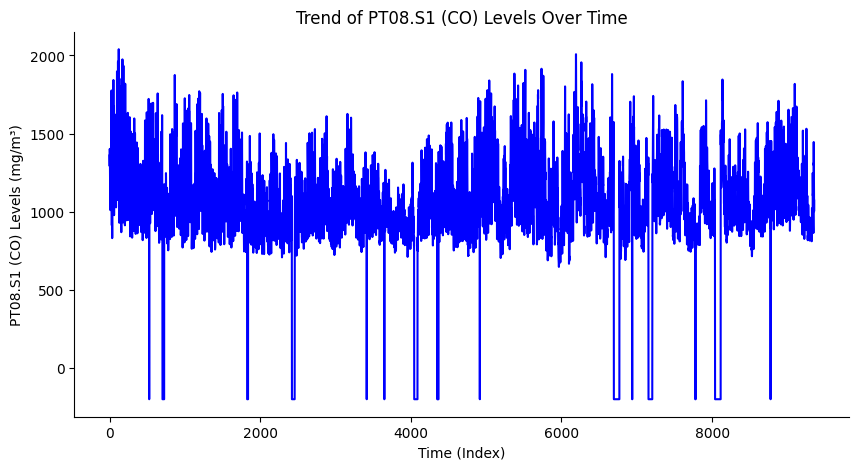

In [13]:
plt.figure(figsize=(10, 5))
data['PT08.S1(CO)'].plot(kind='line', color='blue')
plt.title('Trend of PT08.S1 (CO) Levels Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('PT08.S1 (CO) Levels (mg/m³)')
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide the top and right spines
plt.show()

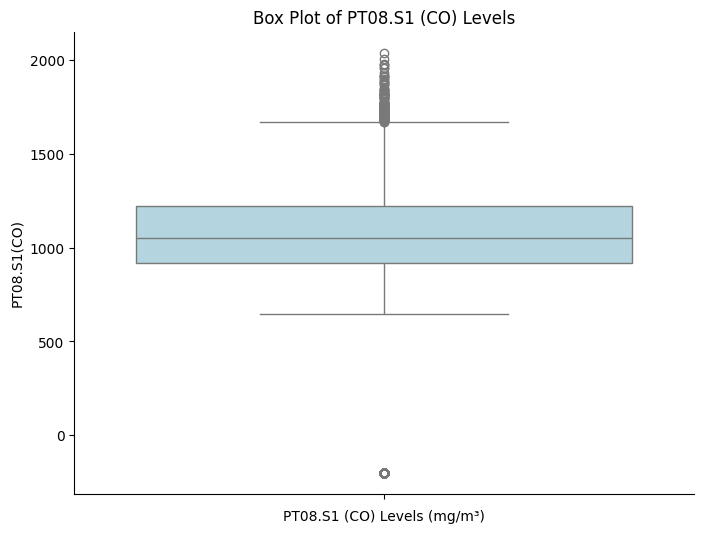

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data['PT08.S1(CO)'], color='lightblue')
plt.title('Box Plot of PT08.S1 (CO) Levels')
plt.xlabel('PT08.S1 (CO) Levels (mg/m³)')
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide the top and right spines
plt.show()


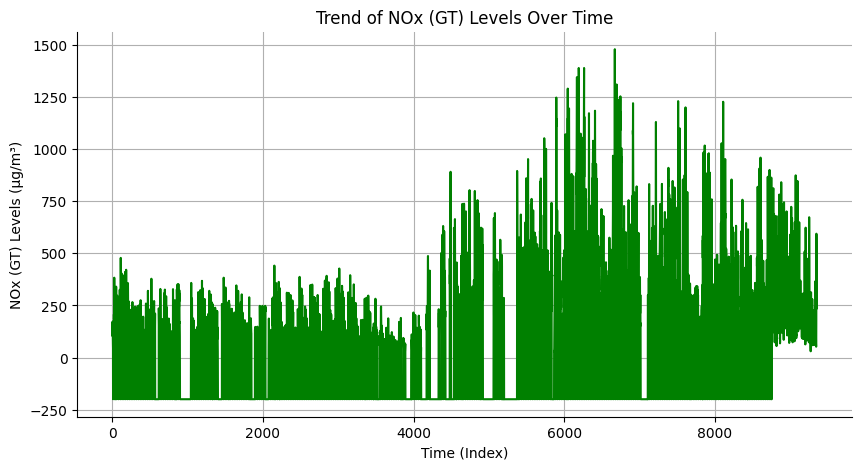

In [15]:
plt.figure(figsize=(10, 5))
data['NOx(GT)'].plot(kind='line', color='green')
plt.title('Trend of NOx (GT) Levels Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('NOx (GT) Levels (μg/m³)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()

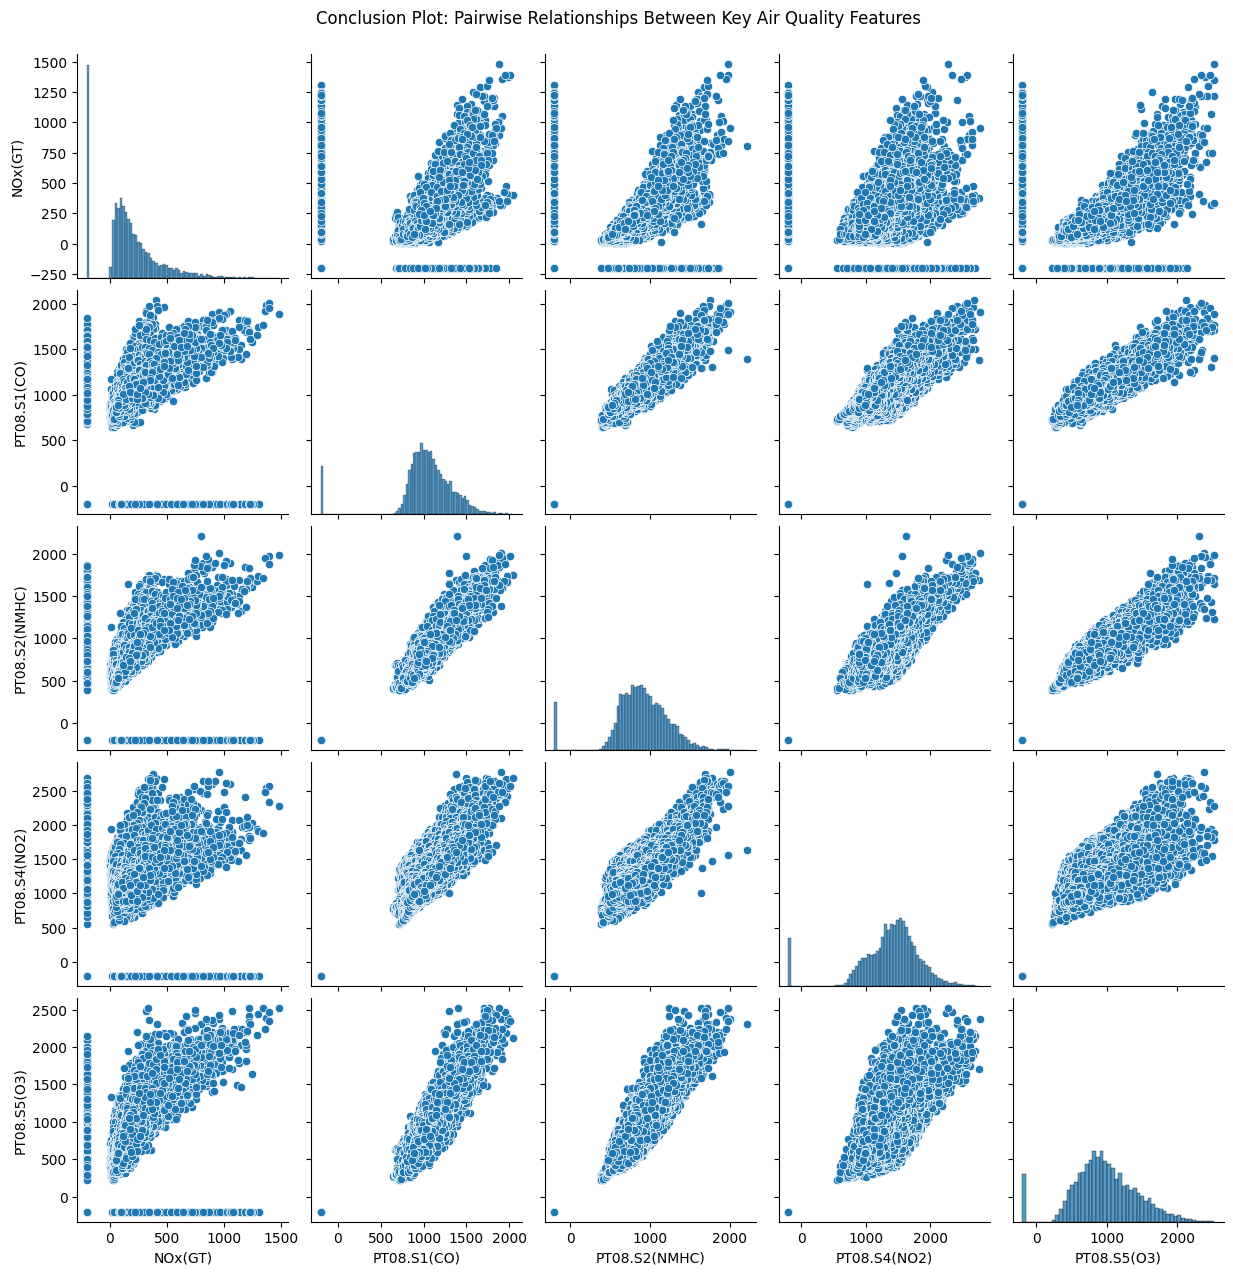

In [16]:
key_features = data[['NOx(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S4(NO2)', 'PT08.S5(O3)']]

sns.pairplot(key_features)
plt.suptitle('Conclusion Plot: Pairwise Relationships Between Key Air Quality Features', y=1.02)
plt.show()